# HUMAN RESOURCES DEPARTMENT PYTHON

## Business Understanding

## **About**

The Look is a company based on United States, with the purpose of prodiving the best quality both products and services in swim equipment and wearable product.

**Human Resources**

Is the department that gathered the data of our human resources and distribution product accros the state.

## Data Understanding

### Libraries

In [47]:
import pandas as pd                   # Alias digunakan untuk mempermudah kita memanggil software library dan methods didalamnya
import numpy as np                    # Numpy adalah paket dasar untuk komputasi ilmiah di python
from math import sqrt                 # memanggil function sqrt, operasi matematika akar
from pandas import Series             # function Series seperti aray 1 dimensi (dengan axis sebagai index) untuk menyimpan berbagai
                                      #tipe data, seperti integer, string, float, python objects, etc.

from matplotlib import pyplot         # pyplot adalah sekumpulan fungsi dari matplotlib yang membuatnya bekerja seperti halnya MATLAB.
from matplotlib.pyplot import figure  # figure memberikan identifier unik untuk sebuah gambar grafik dari pyplot
import matplotlib.pyplot as plt       # matplotlib adalah library komprehensif untuk membuat visualisasi statis, animasi, maupun interaktif di Python
figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k') # menetapkan format gambar grafik dg ukuran (16,12), dpi=80, facecolor=white, edgecolor=black
from matplotlib.pylab import rcParams # rc (runtime configuration) parameters, untuk merubah tampilan visual output matplotlib secara interaktif, 
                                      # (misal ubah warna, jenis garis untuk grafik dll)

import statsmodels.api as sm          # modul berisikan classes dan functions digunakan untuk estimasi model-model statistik, uji tes statistik, dan eksplorasi data.
import statsmodels.tsa.api as smt     # digunakan untuk mengakses Time-series models dan methods pd librari statsmodels
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt  # mengakses 3 modul holt-winters di modul time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose #mengakses modul seasonal decompose pada modul time series analysis
from statsmodels.tsa.stattools import adfuller # mengakses function Augmented Dickey-Fuller unit root test. 
from statsmodels.tsa.arima_model import ARIMA  # mengakses function ARIMA
import statsmodels.formula.api as smf # digunakan untuk menentukan model dengan formula strings dan DataFrames.
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error 

from datetime import datetime         
import warnings                       # built-in modul untuk menghandle message dari issue warning, jika ada package yg obsolete
warnings.filterwarnings('ignore')     # filter untuk mengabaikan tipe warning
import sys                            # mengakses built-in function pada Python (args maupun keyword-args)
import itertools                      # digunakan iterasi pada struktur data yang dapat ditulis ulang menggunakan for-loop. 
                                      # Struktur data seperrti ini juga dikenal sebagai iterables
import seaborn as sns                 # Adalah library visualisasi data di Python yg berdasarkan matplotlib
%matplotlib inline   

import matplotlib.dates as mdates
import matplotlib.pyplot as plty

from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder

## Data Loading and Exploration

In [46]:
data = pd.read_csv('/content/HR 2.csv')
data

,nama_depan,nama_belakang,nama_lengkap,umur,age,jenis_kelamin,lama_jam_absen,lama_pegawai_kerja,latitude,longitude,id_state,nama_state
0,Gutierrez,Molly,MollyGutierrez,32.028816,32,F,36.577306,6.018478,29.9500,-90.0667,5,New Orleans LA
1,Hardwick,Stephen,StephenHardwick,40.320902,40,M,30.165072,5.532445,32.7833,-79.9333,9,Charleston SC
2,Delgado,Chester,ChesterDelgado,48.822047,49,M,83.807798,4.389973,32.0167,-81.1167,10,Savannah GA
3,Simon,Irene,IreneSimon,44.599357,45,F,70.020165,3.081736,41.8369,-87.6847,2,Chicago IL
4,Delvalle,Edward,EdwardDelvalle,35.697876,36,M,0.000000,3.619091,34.0500,-118.2500,4,Los Angeles CA
...,...,...,...,...,...,...,...,...,...,...,...,...
8331,Coniglio,Bianca,BiancaConiglio,46.057544,46,F,93.665111,4.838288,32.7833,-79.9333,9,Charleston SC
8332,Cox,Jimmie,JimmieCox,34.455490,34,M,0.000000,2.427274,35.1174,-89.9711,1,Memphis TN
8333,Hawkins,Mary,MaryHawkins,58.347160,58,F,176.356940,4.009393,32.7833,-79.9333,9,Charleston SC
8334,Proctor,Theresa,TheresaProctor,43.340616,43,F,60.321917,6.154837,39.9500,-75.1667,7,Philadelphia PA


In [ ]:
data.drop("umur", axis=1, inplace=True)
data

,nama_depan,nama_belakang,nama_lengkap,age,jenis_kelamin,lama_jam_absen,lama_pegawai_kerja,latitude,longitude,id_state,nama_state
0,Gutierrez,Molly,MollyGutierrez,32,F,36.577306,6.018478,29.9500,-90.0667,5,New Orleans LA
1,Hardwick,Stephen,StephenHardwick,40,M,30.165072,5.532445,32.7833,-79.9333,9,Charleston SC
2,Delgado,Chester,ChesterDelgado,49,M,83.807798,4.389973,32.0167,-81.1167,10,Savannah GA
3,Simon,Irene,IreneSimon,45,F,70.020165,3.081736,41.8369,-87.6847,2,Chicago IL
4,Delvalle,Edward,EdwardDelvalle,36,M,0.000000,3.619091,34.0500,-118.2500,4,Los Angeles CA
...,...,...,...,...,...,...,...,...,...,...,...
8331,Coniglio,Bianca,BiancaConiglio,46,F,93.665111,4.838288,32.7833,-79.9333,9,Charleston SC
8332,Cox,Jimmie,JimmieCox,34,M,0.000000,2.427274,35.1174,-89.9711,1,Memphis TN
8333,Hawkins,Mary,MaryHawkins,58,F,176.356940,4.009393,32.7833,-79.9333,9,Charleston SC
8334,Proctor,Theresa,TheresaProctor,43,F,60.321917,6.154837,39.9500,-75.1667,7,Philadelphia PA


In [ ]:
data.columns

Index(['nama_depan', 'nama_belakang', 'nama_lengkap', 'age', 'jenis_kelamin',
       'lama_jam_absen', 'lama_pegawai_kerja', 'latitude', 'longitude',
       'id_state', 'nama_state'],
      dtype='object')

In [ ]:
data.dtypes

nama_depan             object
nama_belakang          object
nama_lengkap           object
age                     int64
jenis_kelamin          object
lama_jam_absen        float64
lama_pegawai_kerja    float64
latitude              float64
longitude             float64
id_state                int64
nama_state             object
dtype: object

In [ ]:
data.shape

(8336, 11)

### Articles

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8336 entries, 0 to 8335
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   nama_depan          8336 non-null   object 
 1   nama_belakang       8336 non-null   object 
 2   nama_lengkap        8336 non-null   object 
 3   age                 8336 non-null   int64  
 4   jenis_kelamin       8336 non-null   object 
 5   lama_jam_absen      8336 non-null   float64
 6   lama_pegawai_kerja  8336 non-null   float64
 7   latitude            8336 non-null   float64
 8   longitude           8336 non-null   float64
 9   id_state            8336 non-null   int64  
 10  nama_state          8336 non-null   object 
dtypes: float64(4), int64(2), object(5)
memory usage: 716.5+ KB


In [ ]:
for feature in data.columns:
    print(
        f"- num of unique values in `{feature}`:",
        data[feature].nunique()
    )

- num of unique values in `nama_depan`: 4051
- num of unique values in `nama_belakang`: 1625
- num of unique values in `nama_lengkap`: 8209
- num of unique values in `age`: 70
- num of unique values in `jenis_kelamin`: 2
- num of unique values in `lama_jam_absen`: 7016
- num of unique values in `lama_pegawai_kerja`: 8301
- num of unique values in `latitude`: 10
- num of unique values in `longitude`: 10
- num of unique values in `id_state`: 10
- num of unique values in `nama_state`: 10


> **Insight**
terlihat perbedaan jumlah pada nilai `lama_jam_absen`, `lama_pegawai_kerja`. Sehingga kita perlu melihat **two-way table** antara kedua fitur tersebut

In [ ]:
data.describe()

,age,lama_jam_absen,lama_pegawai_kerja,latitude,longitude,id_state
count,8336.000000,8336.000000,8336.000000,8336.000000,8336.000000,8336.000000
mean,42.010797,61.283978,4.782910,34.667625,-87.987046,5.493762
std,9.941382,49.038365,2.462990,4.334152,12.073775,2.872447
min,4.000000,0.000000,0.012098,29.760400,-118.250000,1.000000
25%,35.000000,19.127590,3.575892,30.694400,-90.066700,3.000000
50%,42.000000,56.005808,4.600248,32.783300,-88.043100,5.000000
75%,49.000000,94.284692,5.623922,39.950000,-79.933300,8.000000
max,78.000000,272.530123,43.735239,41.836900,-73.783400,10.000000


### Korelasi

#### Karena disini ingin menganalisa produktifitas karyawan berdasarkan `lama_jam_absen` dan `lama_pegawai_kerja`, kita akan melihat besar korelasi di fitur tersebut.

In [ ]:
data.corr()

,age,lama_jam_absen,lama_pegawai_kerja,latitude,longitude,id_state
age,1.000000,0.829371,0.053458,0.021982,0.018766,-0.015358
lama_jam_absen,0.829371,1.000000,-0.044202,0.006531,0.016903,-0.010447
lama_pegawai_kerja,0.053458,-0.044202,1.000000,0.014878,0.000977,-0.007180
latitude,0.021982,0.006531,0.014878,1.000000,0.351676,-0.237361
longitude,0.018766,0.016903,0.000977,0.351676,1.000000,0.454043
id_state,-0.015358,-0.010447,-0.007180,-0.237361,0.454043,1.000000


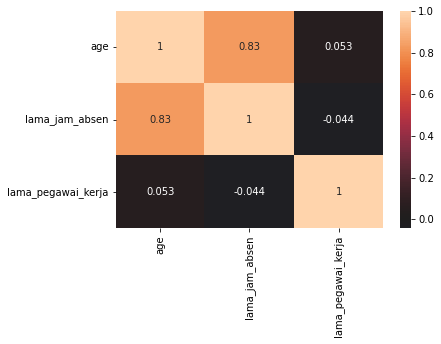

In [ ]:
sns.heatmap(
    data[['age', 'lama_jam_absen', 'lama_pegawai_kerja']].corr(),
    annot=True,
    center=0,
);

In [ ]:
data[['lama_jam_absen', 'lama_pegawai_kerja']].corr()

,lama_jam_absen,lama_pegawai_kerja
lama_jam_absen,1.000000,-0.044202
lama_pegawai_kerja,-0.044202,1.000000


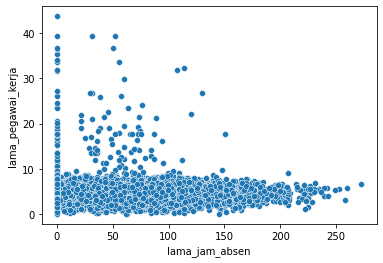

In [ ]:
sns.scatterplot(x='lama_jam_absen', y='lama_pegawai_kerja', data=data)

## Data Preparation

### Outliers

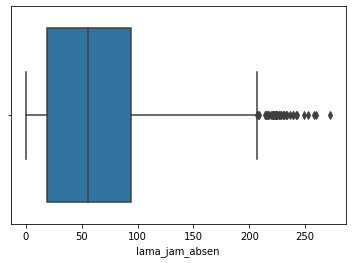

In [ ]:
sns.boxplot(x='lama_jam_absen', data= data)

In [ ]:
y=data['lama_jam_absen']>210
print(x)

0       False
1       False
2       False
3       False
4       False
        ...  
8331    False
8332    False
8333    False
8334    False
8335    False
Name: lama_pegawai_kerja, Length: 8336, dtype: bool


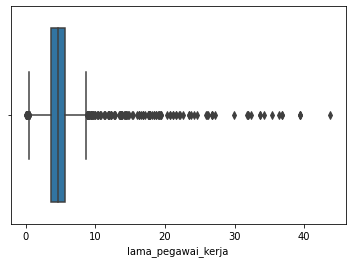

In [ ]:
sns.boxplot(x='lama_pegawai_kerja', data= data)

In [ ]:
x=data['lama_pegawai_kerja']>20
print(x)

0       False
1       False
2       False
3       False
4       False
        ...  
8331    False
8332    False
8333    False
8334    False
8335    False
Name: lama_pegawai_kerja, Length: 8336, dtype: bool


### K-Means

In [58]:
#Pemilihan 2 fitur pembuatan model
data2=data.iloc[:, [6,7]].values

In [59]:
#Library for k-means
from sklearn.cluster import KMeans
wcss=[]

In [60]:
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(data2)
    wcss.append(kmeans.inertia_)

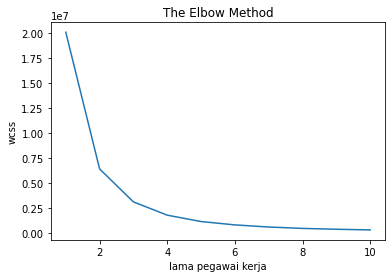

In [61]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('lama pegawai kerja')
plt.ylabel('wcss')
plt.show()

In [ ]:
kmeansmodel = KMeans(n_clusters= 4, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(data2)

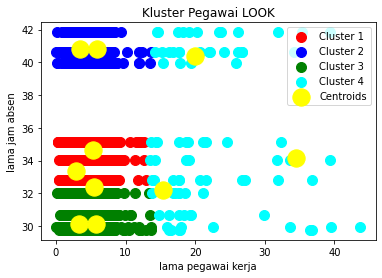

In [ ]:
plt.scatter(data2[y_kmeans == 0, 0], data2[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data2[y_kmeans == 1, 0], data2[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(data2[y_kmeans == 2, 0], data2[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(data2[y_kmeans == 3, 0], data2[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Kluster Pegawai LOOK')
plt.xlabel('lama pegawai kerja')
plt.ylabel('lama jam absen')
plt.legend()
plt.show()